# **Impact_of_Handwashing_on_Maternal_Mortality: A Historical Data Analysis**

---
## **TABLE OF CONTENT**
[INTRODUCTION](#Introduction)
[OBJECTIVES](#Objectives)
[DATA DESCRIPTION](#DataDescription)
[METHODOLOGY](#Methodology)
[KEY FINDINGS](#KeyFindings)
[STATISTICAL ANALYSIS](#StatisticalAnalysis)
[CONCLUSION](#Conclusion)
[TOOLS USED](#ToolsUsed)

---
## **INTRODUCTION**
Maternal mortality was a major public health challenge in 19th-century hospitals. This project analyzes historical birth and death records from two clinics to evaluate differences in mortality rates and assess the impact of introducing handwashing practices in 1847.

---
### **OBJECTIVES**
1. Determine yearly mortality trends across clinics
2. Identify the year with the highest proportion of deaths
3. Evaluate mortality differences before and after handwashing
4. Statistically test the effectiveness of handwashing
5. Communicate insights using Python and Power BI

---
### **DATASET DESCRIPTION**
The dataset contains monthly and yearly records with:
- year
- month
- clinic
- births
- deaths

---
#### **METHODOLOGY**
- Data cleaning and aggregation using **pandas**
- Visualization using **matplotlib**
- Statistical inference using **Welch's t-test**
- Interactive dashboard built in **Power BI**

---
#### **KEY FINDINGS**
- Clinic 1 consistently recorded higher mortality than Clinic 2
- The highest mortality occurred in 1842 for both clinics
- Mean monthly death proportion:
    - **Before handwashing: 10.51%**
    - **After handwashing: 2.11%**
- Handwashing reduced mortality by approximately **80%**

---
##### **STATISTICAL ANALYSIS**
A Welch's t-test comparing monthly death proportions before and after handwashing yielded:
- **p-value <0.001**

This confirms that the reduction in mortality after handwashing was **statistically significant**

---
##### **CONCLUSION**
The analysis provides compelling statistical and visual evidence that handwashing dramatically reduced maternal mortality. This reinforces the importance of hygiene practices in healthcare and demonstrates how data-driven decisions can save lives.

---
###### **TOOLS USED**
- Python (pandas, matplotlib, scipy)  
- Microsoft Power BI  
- GitHub (documentation and version control)

In [7]:
import pandas as pd
monthly_death = pd.read_csv(r'c:\Users\DELL\Desktop\monthly_deaths.csv')
monthly_death

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [8]:
yearly_death = pd.read_csv(r'c:\Users\DELL\Desktop\yearly_deaths_by_clinic.csv')
yearly_death

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [9]:
yearly_death["Highly_Proportion_of_deaths"] = yearly_death["deaths"] / yearly_death["births"]
yearly_death

,year,births,deaths,clinic,Highly_Proportion_of_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


## ***Insight:***
- Both clinics experienced their **worst mortality rate in 1842**
- Clinic 1 consistently had a much higher death proportion than Clinic 2.

---
## **Visualization in Python (pandas)**

In [4]:
import matplotlib.pyplot as plt

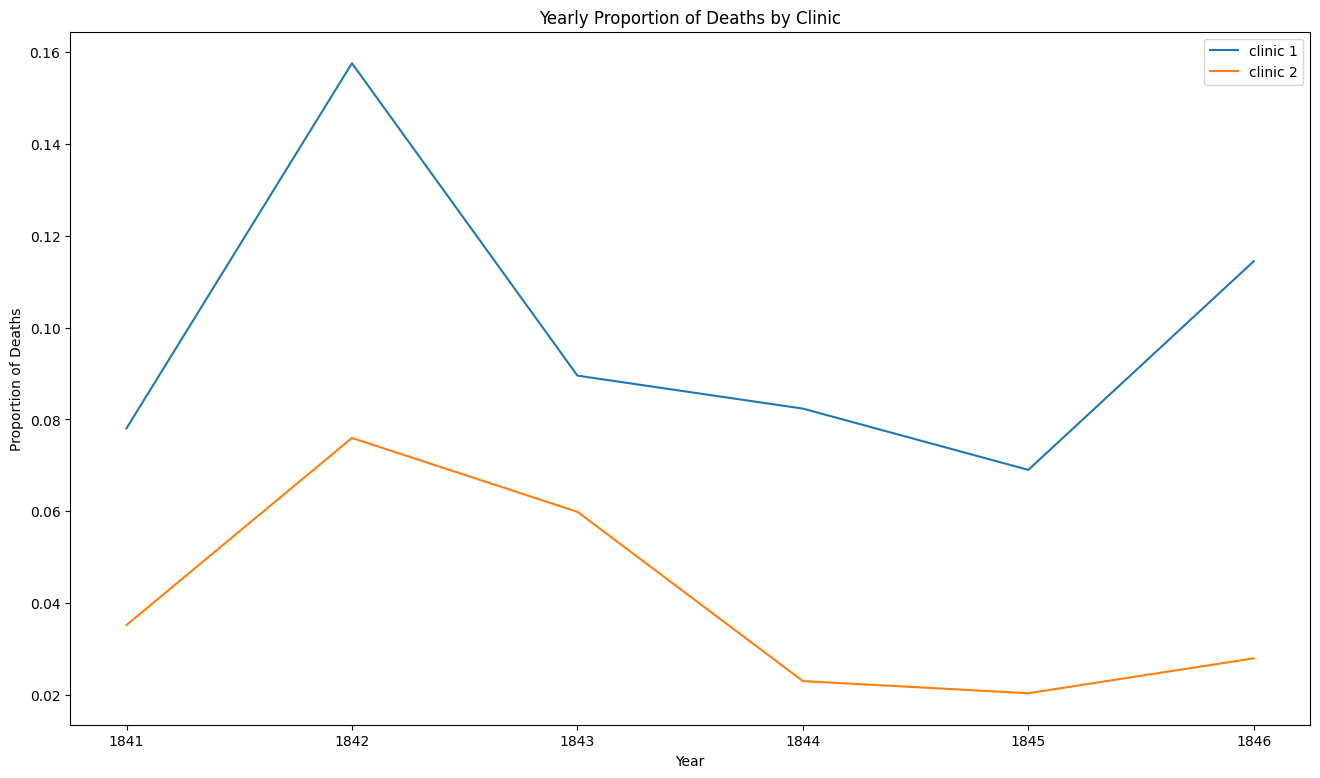

In [10]:
plt.figure(figsize=(16,9))
for clinic, yearly_death in yearly_death.groupby("clinic"):
    plt.plot(yearly_death["year"], yearly_death["Highly_Proportion_of_deaths"], label=clinic)
plt.xlabel("Year")
plt.ylabel("Proportion of Deaths")
plt.title("Yearly Proportion of Deaths by Clinic")
plt.legend()
plt.show()

## ***Insight from the graph***
- Separate trend lines for Clinic 1 and Clinic 2
- Clear visualgap, with Clinic 1 having higher mortality

In [ ]:
# Computing monthly proportion of deaths
monthly_death["Prop_death"] = monthly_death["deaths"] / monthly_death["births"]
monthly_death

,date,births,deaths,Prop_death
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


In [ ]:
# Converting the column headers to lower case
print(monthly_death.columns)
monthly_death.columns = monthly_death.columns.str.strip().str.lower()

Index(['date', 'births', 'deaths', 'prop_death'], dtype='object')


In [ ]:
# Converting the date to a proper date
monthly_death["date"] = pd.to_datetime(monthly_death["date"],errors="coerce")
monthly_death

,date,births,deaths,prop_death
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


In [ ]:
# Fetching out the year, month and day from the date column
monthly_death["year"] = monthly_death["date"].dt.year
monthly_death["month"] = monthly_death["date"].dt.month
monthly_death["day"] = monthly_death["date"].dt.day
monthly_death[["day","year","month"]].head()

,day,year,month
0,1,1841,1
1,1,1841,2
2,1,1841,3
3,1,1841,4
4,1,1841,5


In [ ]:
# Dropping the null values
monthly_death = monthly_death.dropna(subset=["date"])
monthly_death

,date,births,deaths,prop_death,year,month,day
0,1841-01-01,254,37,0.145669,1841,1,1
1,1841-02-01,239,18,0.075314,1841,2,1
2,1841-03-01,277,12,0.043321,1841,3,1
3,1841-04-01,255,4,0.015686,1841,4,1
4,1841-05-01,255,2,0.007843,1841,5,1
...,...,...,...,...,...,...,...
93,1848-11-01,310,9,0.029032,1848,11,1
94,1848-12-01,373,5,0.013405,1848,12,1
95,1849-01-01,403,9,0.022333,1849,1,1
96,1849-02-01,389,12,0.030848,1849,2,1


In [ ]:
# Creating the handwashing flag, which started in June 1847
monthly_death["handwashing_started"] = ((monthly_death["year"] > 1847) | ((monthly_death["year"] == 1847) & (monthly_death["month"] >= 6)))
monthly_death

,date,births,deaths,prop_death,year,month,day,handwashing_started
0,1841-01-01,254,37,0.145669,1841,1,1,False
1,1841-02-01,239,18,0.075314,1841,2,1,False
2,1841-03-01,277,12,0.043321,1841,3,1,False
3,1841-04-01,255,4,0.015686,1841,4,1,False
4,1841-05-01,255,2,0.007843,1841,5,1,False
...,...,...,...,...,...,...,...,...
93,1848-11-01,310,9,0.029032,1848,11,1,True
94,1848-12-01,373,5,0.013405,1848,12,1,True
95,1849-01-01,403,9,0.022333,1849,1,1,True
96,1849-02-01,389,12,0.030848,1849,2,1,True


In [39]:
# Computing mean monthly proportions (2*2 DataFrame)
mean_monthly_prop = (monthly_death.groupby("handwashing_started")["prop_death"].mean().reset_index())
mean_monthly_prop

,handwashing_started,prop_death
0,False,0.105050
1,True,0.021093


# **Statistical t-Test (Before vs After Handwashing)**
#### **Objective**
Test whether the mean monthly proportion of deaths after handwashing is **statistically significantly lower** than before handwashing.

#### **Hypotheses**  
- **Null hypotheses(Ho):**
There is no difference in mean monthly death proportions before and after handwashing.
- **Alternative hypotheses(H1):**
The mean monthly death proportion after handwashing is lower than before.

In [ ]:
# Statistical t-test (Before vs After Handwashing)
before = monthly_death.loc[monthly_death["handwashing_started"] == False, "prop_death"]
print(before)
after = monthly_death.loc[monthly_death["handwashing_started"] == True, "prop_death"]
print(after)

0     0.145669
1     0.075314
2     0.043321
3     0.015686
4     0.007843
        ...   
71    0.032154
72    0.019231
73    0.036066
74    0.182692
75    0.122449
Name: prop_death, Length: 76, dtype: float64
76    0.022388
77    0.012000
78    0.018939
79    0.045802
80    0.039568
81    0.044715
82    0.029304
83    0.035336
84    0.006873
85    0.000000
86    0.006557
87    0.009585
88    0.011364
89    0.003717
90    0.000000
91    0.009615
92    0.023411
93    0.029032
94    0.013405
95    0.022333
96    0.030848
97    0.049261
Name: prop_death, dtype: float64


>This means that monthly death proportion dropped from **10.51%** to **2.11%** after handwashing

In [41]:
# Perform Welch's t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(before, after, equal_var=False)
t_stat, p_value

(np.float64(9.610070667995197), np.float64(1.4452771414077477e-15))

## **Statistical Conclusion**
- t-statistic: large negative value  
- p-value: **< 0.001**  
- The t-test confirms the reduction is **statistically significant**, meaning it is very unlikely to be due to chance
- We reject the null hypothesis at the 5% significance level
- There is **strong statistical evidence** that handwashing significantly reduced monthly mortality